# PCA (Principal Component Analysis)

`Principal Component Analysis (PCA)` is a **dimensionality reduction technique** that transforms the original
features into a new set of **uncorrelated components** (principal components) that capture the maximum
variance in the data.

The new components are linear combinations of the original features and are ordered by the amount of
variance they explain.

---

## Why Use PCA

PCA is useful because it:
- Reduces the number of features  
- Removes redundant and highly correlated variables  
- Reduces noise in the data  
- Improves training speed and stability  
- Helps visualize high-dimensional data  

It is especially helpful when datasets have many correlated features.

---

## How PCA Works (High-Level)

1. Standardize the data  
2. Compute the covariance matrix  
3. Find eigenvectors and eigenvalues  
4. Select top components with highest variance  
5. Project data onto the selected components  

---

## When PCA Works Best

PCA performs best when:
- Features are highly correlated  
- Dataset has many dimensions  
- Noise reduction is needed  
- Model performance degrades due to high dimensionality  

---

## Models That Benefit from PCA

PCA works well with:
- Linear models  
- Support Vector Machines (SVM)  
- k-Means clustering  
- k-Nearest Neighbors (k-NN)  
- Other distance-based algorithms  

Tree-based models usually do not benefit from PCA.

---

## Curse of Dimensionality (Brief)

As the number of features increases:
- Data points become sparse  
- Distances between points lose meaning  
- All points appear almost equally far apart  

This negatively impacts:
- Clustering algorithms  
- k-NN  
- Distance-based learning  

PCA helps by reducing dimensionality and restoring meaningful distance relationships.

---

## Why Variance Is Important in PCA

- High variance components contain **more useful information**  
- Low variance components often represent **noise**  
- PCA prioritizes directions with maximum variance  

By keeping only high-variance components, PCA retains the most important patterns while discarding noise.

---

## Limitations of PCA

- Components are harder to interpret  
- PCA is a linear technique  
- Important low-variance features may be removed  
- Sensitive to feature scaling  

---

## Best Practices

- Always scale data before applying PCA  
- Use explained variance to choose the number of components  
- Apply PCA inside a pipeline to avoid data leakage  
- Do not apply PCA blindly—validate its impact on performance  

---

## Summary

PCA is a powerful dimensionality reduction technique that transforms correlated features into a smaller set
of uncorrelated components while preserving most of the data variance. It helps combat the curse of
dimensionality, reduce noise, and improve performance for many machine learning algorithms.


In [5]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly



In [6]:
import numpy as np
import pandas as pd

np.random.seed(23)

# Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.eye(3)  # identity covariance
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

# Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.eye(3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

# Combine
df = pd.concat([df, df1], ignore_index=True)

# Shuffle + reset index
df = df.sample(40, random_state=23).reset_index(drop=True)

df.head()


,feature1,feature2,feature3,target
0,-0.331617,-1.632386,0.619114,1
1,1.010229,1.437830,2.327788,0
2,0.241106,-0.952510,-0.136267,1
3,1.676860,4.187503,-0.080565,0
4,2.823378,-0.332863,2.637391,0


In [8]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [10]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)


Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [11]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [13]:

eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

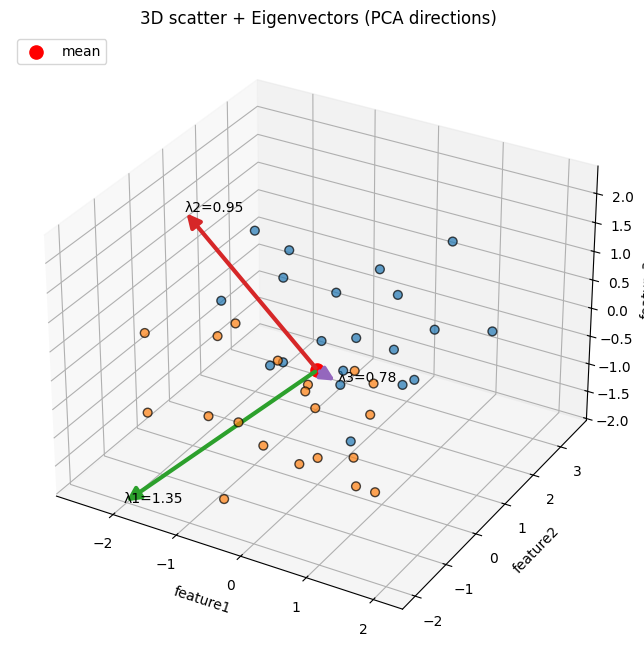

In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = (np.asarray(xs), np.asarray(ys), np.asarray(zs))
        # store last projected 2D positions so draw() doesn't re-project
        self._proj2d = None

    def draw(self, renderer):
        # draw uses the 2D positions prepared in do_3d_projection
        if self._proj2d is not None:
            (x0, y0), (x1, y1) = self._proj2d
            self.set_positions((x0, y0), (x1, y1))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        """
        Called by Axes3D before drawing to allow depth-sorting.
        We project 3D endpoints to 2D using the axes projection matrix
        and cache the 2D positions for draw().
        Return a depth value (float) for z-ordering.
        """
        # get axes projection matrix (safe approach)
        try:
            M = self.axes.get_proj()
        except Exception:
            # fallback if axes not set
            return 0

        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, M)

        # cache 2D positions for draw()
        self._proj2d = ((xs[0], ys[0]), (xs[1], ys[1]))

        # return depth for sorting (use min z so far)
        return np.min(zs)

# --- create or reuse example df ---
try:
    df
except NameError:
    np.random.seed(23)
    class1 = np.random.multivariate_normal([0,0,0], np.eye(3), 20)
    class2 = np.random.multivariate_normal([1,1,1], np.eye(3), 20)
    df = pd.DataFrame(np.vstack([class1, class2]), columns=['feature1','feature2','feature3'])
    df['target'] = [1]*20 + [0]*20
    df = df.sample(frac=1, random_state=23).reset_index(drop=True)

# --- compute PCA-like eigenvectors ---
X = df[['feature1','feature2','feature3']].values
mean_vec = X.mean(axis=0)
X_centered = X - mean_vec
cov_mat = np.cov(X_centered, rowvar=False)
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]
scale_factor = 3.0
scaled_vecs = eig_vecs * np.sqrt(eig_vals) * scale_factor

# --- plotting ---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = df['target'].map({0:'C0', 1:'C1'})
ax.scatter(df['feature1'], df['feature2'], df['feature3'],
           c=colors, s=40, alpha=0.7, edgecolor='k')

ax.scatter([mean_vec[0]], [mean_vec[1]], [mean_vec[2]],
           color='red', s=90, label='mean')

for i in range(scaled_vecs.shape[1]):
    v = scaled_vecs[:, i]
    start = mean_vec
    end = mean_vec + v
    a = Arrow3D([start[0], end[0]],
                [start[1], end[1]],
                [start[2], end[2]],
                mutation_scale=20, lw=3, arrowstyle='-|>', color=f'C{i+2}')
    ax.add_artist(a)
    ax.text(end[0], end[1], end[2], f'λ{i+1}={eig_vals[i]:.2f}', fontsize=10)

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
ax.set_title('3D scatter + Eigenvectors (PCA directions)')
ax.legend(loc='upper left')

plt.show()

In [18]:
pc = eigen_vectors[0:2]
pc
     

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [19]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.726114,0.492511,1
1,-0.220797,-1.441911,0
2,0.688605,0.658084,1
3,-3.367715,-0.254627,0
4,0.227326,-2.669841,0
